In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
import tensorflow as tf
import sklearn
import sys, os
import requests
import time

/Users/architg/miniforge3/envs/tf_m1/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
data = pd.read_csv('USMAP_3000points.csv')

In [3]:
print(len(data))
data.head()

3268


,lat,lon
0,48.0,-124.5
1,40.0,-124.0
2,40.5,-124.0
3,41.0,-124.0
4,41.5,-124.0


In [63]:
n = 696
X = data.iloc[n].lat
Y = data.iloc[n].lon

In [64]:
attr ='air_temperature, clearsky_dhi, clearsky_dni, clearsky_ghi, cloud_type, dew_point, dhi, dni, fill_flag, ghi, relative_humidity, solar_zenith_angle, surface_albedo, surface_pressure, total_precipitable_water, wind_direction, wind_speed'
year = '2020'
leap = 'false'
interval = '30'
utc = 'false'
name = 'Archit+Gupta'
affiliation = 'NTU'
mailing_list = 'false'
reason = 'Research'
email = 'archit001@e.ntu.edu'

In [65]:
lon = Y
lat = X
print(lat)
print(lon)

48.0
-112.5


In [66]:
api_key = 'yJWqNPJq3NXlbvu4kpQfqjOUln0Nh4unfovTLvHW'

url = 'http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap, interval=interval, utc=utc, name=name, email=email, mailing_list=mailing_list, affiliation=affiliation, reason=reason, api=api_key, attr=attr)
url = url.replace(" ","")

# %2c in url -> comma
# %20 in url -> space

In [67]:
info = pd.read_csv(url, low_memory=False, nrows = 2)

In [68]:
# print(info.head(n=1))
latitude = info['Latitude']
longitude = info['Longitude']
elevation = info['Elevation']
time_zone = info['Local Time Zone']
print('Latitude: ', latitude[0])
print('Longitude: ', longitude[0])
print('Elevation: ', elevation[0])
print('Time Zone: ',time_zone[0])

Latitude:  48.01
Longitude:  -112.5
Elevation:  1323
Time Zone:  -7


In [69]:
df = pd.read_csv(url, low_memory=False, skiprows = 2)

In [70]:
df.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DNI,Fill Flag,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
0,2020,1,1,0,0,1.2,0,0,0,9,...,0,0,0,75.48,154.18,0.18,844,0.8,256,4.7
1,2020,1,1,0,30,0.9,0,0,0,9,...,0,0,0,77.03,155.03,0.18,843,0.8,256,4.5
2,2020,1,1,1,0,0.7,0,0,0,9,...,0,0,0,77.08,154.47,0.18,843,0.8,256,4.3
3,2020,1,1,1,30,0.6,0,0,0,9,...,0,0,0,77.64,152.59,0.18,843,0.8,255,4.2
4,2020,1,1,2,0,0.5,0,0,0,6,...,0,0,0,77.97,149.65,0.18,843,0.9,255,4.0


In [71]:
df.sample(n=15)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DNI,Fill Flag,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
477,2020,1,10,22,30,-5.9,0,0,0,7,...,0,0,0,82.95,143.53,0.87,849,0.6,240,1.9
7673,2020,6,9,20,30,7.2,2,24,2,0,...,24,0,2,77.05,91.05,0.17,866,1.4,263,1.9
5986,2020,5,5,17,0,15.4,71,826,442,0,...,757,4,422,30.80,63.30,0.17,869,1.0,109,1.6
8324,2020,6,23,10,0,24.7,69,938,799,0,...,938,0,799,42.20,38.86,0.17,867,2.3,287,1.3
15310,2020,11,15,23,0,-1.0,0,0,0,4,...,0,0,0,88.90,147.14,0.87,862,0.5,260,2.5
3617,2020,3,17,8,30,-1.1,64,823,312,0,...,823,0,312,65.33,72.45,0.87,856,0.2,281,2.7
716,2020,1,15,22,0,-18.7,0,0,0,6,...,0,0,0,74.44,138.26,0.87,861,0.4,35,0.9
3703,2020,3,19,3,30,-8.9,0,0,0,4,...,0,0,0,91.09,119.49,0.87,863,0.5,82,1.2
8930,2020,7,6,1,0,11.0,0,0,0,0,...,0,0,0,72.96,109.15,0.19,866,1.6,114,0.6
2440,2020,2,20,20,0,-4.4,0,0,0,4,...,0,0,0,68.64,110.73,0.87,866,0.1,255,4.0


In [72]:
print(df.columns)

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'Fill Flag', 'GHI', 'Relative Humidity', 'Solar Zenith Angle',
       'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Direction',
       'Wind Speed'],
      dtype='object')


In [73]:
print(len(df))

17520


# Data Collection Methodology
1. For each location (lat & lon pair), we have data for each month's each day's each half an hour -> `17,520` data points for each location
2. There are `3268` total locations (lat & lon pairs)
3. Therefore, the total amount of data available to us is `57,255,360`

Given the restricted computational resources and time, it isn't feasible to train a model on 57 million data points. \
As a result, before we carry out EDA and model building, we will limit the data we collect at in order to maximise our insight while minimsing our data congestion.

## Limiting Timespan
An important consideration while limiting timespan is our need to have high temporal resolution. As a result, we can't simply aggregate information for each month/week even though it reduces the data 1000-fold; instead, we want to understand the changes in hourly-trends.

### Approach 1
We can randomly sample data points for each location. Given the vast number of locations, a random sample (of let's say 100 data points) on all of them should cover all conditions.\
However, this involves loading all data points into memory at least once—saving only 100 of them into a csv.

### Approach 2
We can look into and plot the data for various hours/days/months/seasons in hopes of spotting a trend/pattern

## Limiting Locations

# Data Transformation

In [74]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'Fill Flag', 'GHI', 'Relative Humidity', 'Solar Zenith Angle',
       'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Direction',
       'Wind Speed'],
      dtype='object')

In [75]:
df.dtypes

Year                    int64
Month                   int64
Day                     int64
Hour                    int64
Minute                  int64
Temperature           float64
Clearsky DHI            int64
Clearsky DNI            int64
Clearsky GHI            int64
Cloud Type              int64
Dew Point             float64
DHI                     int64
DNI                     int64
Fill Flag               int64
GHI                     int64
Relative Humidity     float64
Solar Zenith Angle    float64
Surface Albedo        float64
Pressure                int64
Precipitable Water    float64
Wind Direction          int64
Wind Speed            float64
dtype: object

Logically, the minute column is only relevant when combined with the hour—that is, we know the time in a unified format. For this purpose, we decided to calculate time in terms of minutes; however, we could've also taken the 24-hour approach

In [76]:
df['Time'] = df['Hour']*60 + df['Minute']
df['Time']

0           0
1          30
2          60
3          90
4         120
         ... 
17515    1290
17516    1320
17517    1350
17518    1380
17519    1410
Name: Time, Length: 17520, dtype: int64

In [77]:
df_controlled = df.filter(['Year','Month','Day','Hour', 'Minute', 'Temperature', 'Cloud Type', 'Relative Humidity', 'Pressure', 'Precipitable Water', 'Time'], axis=1)


Moreover, we also need to combine the day and month columns to achive a useful metric; we do so by creating a week column

In [78]:
def weekCalculator(month, day):
    month_to_days = {}
    month_to_days[1] = 0
    month_to_days[2] = 31
    month_to_days[3] = 28
    month_to_days[4] = 31
    month_to_days[5] = 30
    month_to_days[6] = 31
    month_to_days[7] = 30
    month_to_days[8] = 31
    month_to_days[9] = 31
    month_to_days[10] = 30
    month_to_days[11] = 31
    month_to_days[12] = 30
    
    total_days = 0
    for i in range(1, month+1):
        total_days = total_days + month_to_days[i]
    total_days = total_days + day
    week_number = int(total_days/7) + 1
    return week_number

In [79]:
def dayCalculator(month, day):
    month_to_days = {}
    month_to_days[1] = 0
    month_to_days[2] = 31
    month_to_days[3] = 28
    month_to_days[4] = 31
    month_to_days[5] = 30
    month_to_days[6] = 31
    month_to_days[7] = 30
    month_to_days[8] = 31
    month_to_days[9] = 31
    month_to_days[10] = 30
    month_to_days[11] = 31
    month_to_days[12] = 30
    
    total_days = 0
    for i in range(1, month+1):
        total_days = total_days + month_to_days[i]
    total_days = total_days + day
    return total_days

In [80]:
df_controlled['Day Number'] = df_controlled.apply(lambda df_controlled : dayCalculator(int(df_controlled['Month']), int(df_controlled['Day'])), axis = 1)
df_controlled['Week'] = df_controlled.apply(lambda df_controlled : weekCalculator(int(df_controlled['Month']), int(df_controlled['Day'])), axis = 1)
df_controlled.sample(n=10)
len(df_controlled)

17520

To make it easier to classify time, we divide it into 4 parts -> Morning, Afternoon, Evening, and Night

In [81]:
import math

In [82]:
def sh(rh, temp, p):
    # pressure in millibar
    # temp in C
    # rh in percent
    # precipitable water in millimeter (mm)
    p_Pa = p*100 # in Pa
    exponent_factor = math.exp(17.625/(temp+243.08))
    sh_val = (rh*3800*exponent_factor)/p_Pa
    return sh_val

In [83]:
df['Specific Humidity'] = df.apply(lambda df : sh(float(df['Relative Humidity']), float(df['Temperature']), float(df['Pressure'])), axis = 1)

In [84]:
df['Specific Humidity']

0        3.652647
1        3.732408
2        3.735052
3        3.762300
4        3.778403
           ...   
17515    3.635436
17516    3.632108
17517    3.658346
17518    3.647700
17519    3.673940
Name: Specific Humidity, Length: 17520, dtype: float64

Text(0, 0.5, 'Precipitable Water')

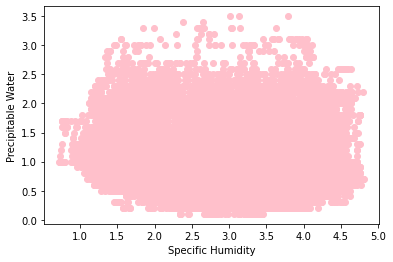

In [88]:
plt.scatter(df['Specific Humidity'], df['Precipitable Water'],color='pink') 
plt.xlabel("Specific Humidity")
plt.ylabel("Precipitable Water")

In [22]:
morning = (df_controlled['Time'] >= 300) & (df_controlled['Time'] < 720) #use variable with condition
df_morning = df_controlled.loc[morning] # data between dates
df_morning['Day Part'] = 'Morning'
# df_morning.head()

/var/folders/s4/kwh94x893cx7r1phpl_k4fk80000gn/T/ipykernel_59315/3731838970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_morning['Day Part'] = 'Morning'


In [23]:
afternoon = (df_controlled['Time'] >= 720) & (df_controlled['Time'] < 1020) #use variable with condition
df_afternoon = df_controlled.loc[afternoon] # data between dates
df_afternoon['Day Part'] = 'Afternoon'
# df_afternoon.head()

/var/folders/s4/kwh94x893cx7r1phpl_k4fk80000gn/T/ipykernel_59315/170895084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_afternoon['Day Part'] = 'Afternoon'


In [24]:
evening = (df_controlled['Time'] >= 1020) & (df_controlled['Time'] < 1260) #use variable with condition
df_evening = df_controlled.loc[evening] # data between dates
df_evening['Day Part'] = 'Evening'
# df_evening.head()

/var/folders/s4/kwh94x893cx7r1phpl_k4fk80000gn/T/ipykernel_59315/1616217406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evening['Day Part'] = 'Evening'


In [25]:
night = (df_controlled['Time'] >= 1260) | (df_controlled['Time'] < 300) #use variable with condition
df_night = df_controlled.loc[night] # data between dates
df_night['Day Part'] = 'Night'
# df_night.head()

/var/folders/s4/kwh94x893cx7r1phpl_k4fk80000gn/T/ipykernel_59315/3192208289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_night['Day Part'] = 'Night'


In [26]:
df_controlled_dayPart = pd.concat([df_night, df_morning, df_afternoon, df_evening])

In [27]:
df_controlled_dayPart.sample(n=10)
len(df_controlled_dayPart)

17520

Including seasonal data

In [28]:
spring = (df_controlled_dayPart['Day Number'] >= 79) & (df_controlled_dayPart['Day Number'] < 171) #use variable with condition
df_spring = df_controlled_dayPart.loc[spring] # data between dates
df_spring['Season'] = 'Spring'

/var/folders/s4/kwh94x893cx7r1phpl_k4fk80000gn/T/ipykernel_59315/575200486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spring['Season'] = 'Spring'


In [29]:
summer = (df_controlled_dayPart['Day Number'] >= 171) & (df_controlled_dayPart['Day Number'] < 265) #use variable with condition
df_summer = df_controlled_dayPart.loc[summer] # data between dates
df_summer['Season'] = 'Summer'

/var/folders/s4/kwh94x893cx7r1phpl_k4fk80000gn/T/ipykernel_59315/2041048749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer['Season'] = 'Summer'


In [30]:
fall = (df_controlled_dayPart['Day Number'] >= 265) & (df_controlled_dayPart['Day Number'] < 355) #use variable with condition
df_fall = df_controlled_dayPart.loc[fall] # data between dates
df_fall['Season'] = 'Fall'

/var/folders/s4/kwh94x893cx7r1phpl_k4fk80000gn/T/ipykernel_59315/2557255262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fall['Season'] = 'Fall'


In [31]:
winter = (df_controlled_dayPart['Day Number'] >= 355) | (df_controlled_dayPart['Day Number'] < 79) #use variable with condition
df_winter = df_controlled_dayPart.loc[winter] # data between dates
df_winter['Season'] = 'Winter'

/var/folders/s4/kwh94x893cx7r1phpl_k4fk80000gn/T/ipykernel_59315/188173600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_winter['Season'] = 'Winter'


In [32]:
df_controlled_season = pd.concat([df_spring, df_summer, df_fall, df_winter])
len(df_controlled_season)

17520

In [33]:
df_controlled_unordered = df_controlled_season.copy()
df_controlled_unordered.sample(n=10)

,Year,Month,Day,Hour,Minute,Temperature,Cloud Type,Relative Humidity,Pressure,Precipitable Water,Time,Day Number,Week,Day Part,Season
200,2020,1,5,4,0,6.5,4,94.45,1008,1.4,240,5,1,Night,Winter
7738,2020,6,11,5,0,11.1,7,95.08,1007,2.4,300,162,24,Morning,Spring
2575,2020,2,23,15,30,5.5,4,89.54,1006,1.1,930,54,8,Afternoon,Winter
10574,2020,8,9,7,0,15.1,0,83.84,1015,2.2,420,221,32,Morning,Summer
7868,2020,6,13,22,0,8.5,0,93.77,1004,1.5,1320,164,24,Night,Spring
1623,2020,2,3,19,30,2.0,8,58.10,1019,0.7,1170,34,5,Evening,Winter
14607,2020,11,1,7,30,8.9,0,70.67,1012,1.3,450,305,44,Morning,Fall
9448,2020,7,16,20,0,14.1,0,96.88,1007,2.3,1200,197,29,Evening,Summer
10128,2020,7,31,0,0,14.3,0,91.18,1004,3.0,0,212,31,Night,Summer
5486,2020,4,25,7,0,10.5,6,95.43,1000,1.8,420,115,17,Morning,Spring


In [34]:
df_controlled_scaled_up = df_controlled_unordered.filter(['Month','Temperature', 'Time', 'Cloud Type', 'Relative Humidity', 'Pressure', 'Precipitable Water', 'Week', 'Day Part', 'Season'], axis=1)
print(len(df_controlled_scaled_up))
df_controlled_scaled_up.sample(n=10)

17520


,Month,Temperature,Time,Cloud Type,Relative Humidity,Pressure,Precipitable Water,Week,Day Part,Season
970,1,7.4,300,8,92.91,989,1.3,4,Morning,Winter
14422,10,12.5,660,6,96.21,1013,2.0,44,Morning,Fall
4336,4,5.4,480,0,88.92,1007,1.0,14,Morning,Spring
1381,1,5.6,1110,0,92.48,1011,0.7,5,Evening,Winter
1018,1,6.3,300,8,93.65,1002,1.3,4,Morning,Winter
11032,8,14.7,1200,7,98.31,1008,2.3,33,Evening,Summer
12603,9,19.1,810,0,69.65,1007,1.9,38,Afternoon,Summer
6055,5,4.8,210,0,93.38,1020,0.9,19,Night,Spring
3145,3,4.6,750,0,82.10,1000,0.8,10,Afternoon,Winter
15140,11,6.9,600,4,94.49,1001,1.6,46,Morning,Fall


In [35]:
df_controlled_scaled_down = df_controlled_unordered.filter(['Day Number', 'Hour', 'Minute', 'Temperature', 'Cloud Type', 'Relative Humidity', 'Pressure', 'Precipitable Water', 'Week', 'Day Part'], axis=1)
print(len(df_controlled_scaled_down))
df_controlled_scaled_down.sample(n=10)

17520


,Day Number,Hour,Minute,Temperature,Cloud Type,Relative Humidity,Pressure,Precipitable Water,Week,Day Part
12733,266,6,30,15.1,6,95.47,994,3.3,39,Morning
15805,330,6,30,5.6,8,91.35,1017,1.1,48,Morning
9559,200,3,30,12.5,0,95.04,1010,2.3,29,Night
5117,107,14,30,13.0,4,67.16,1003,1.9,16,Afternoon
8586,179,21,0,12.5,0,92.60,1004,2.1,26,Night
2737,58,0,30,5.5,8,95.55,1021,1.5,9,Night
15294,319,15,0,9.1,0,90.36,1005,1.3,46,Afternoon
593,13,8,30,0.4,4,77.03,998,0.7,2,Morning
9702,203,3,0,12.7,0,96.19,1001,2.3,30,Night
3554,75,1,0,1.5,0,80.30,1012,0.8,11,Night


# Data Visualisation

## Trend Over The Year

In [36]:
daily_table = df_controlled_unordered.pivot_table(index = ['Day Number']  , aggfunc = { 'Pressure' : np.mean , 'Precipitable Water' : np.mean, 'Relative Humidity':np.mean } )
daily_table = daily_table.reset_index()

In [37]:
weekly_table = df_controlled_unordered.pivot_table(index = ['Week']  , aggfunc = { 'Pressure' : np.mean , 'Precipitable Water' : np.mean, 'Relative Humidity':np.mean } )
weekly_table = weekly_table.reset_index()

In [38]:
monthly_table = df_controlled_unordered.pivot_table(index = ['Month']  , aggfunc = { 'Pressure' : np.mean , 'Precipitable Water' : np.mean, 'Relative Humidity':np.mean } )
monthly_table = monthly_table.reset_index()

In [39]:
seasonal_table = df_controlled_unordered.pivot_table(index = ['Season']  , aggfunc = { 'Pressure' : np.mean , 'Precipitable Water' : np.mean, 'Relative Humidity':np.mean } )
seasonal_table = seasonal_table.reset_index()

In [40]:
plt.style.use('seaborn-paper')
plt.xkcd() 

### All Data Points

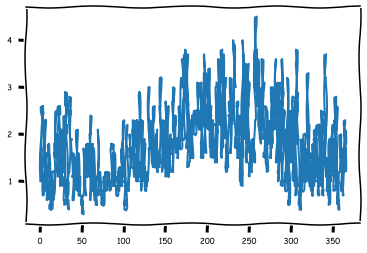

In [41]:
plt.plot(df_controlled['Day Number'] , df_controlled['Precipitable Water'] )

### Daily Trend

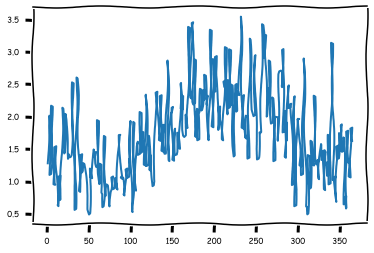

In [42]:
plt.plot(daily_table['Day Number'] , daily_table['Precipitable Water'] )

### Weekly Trend

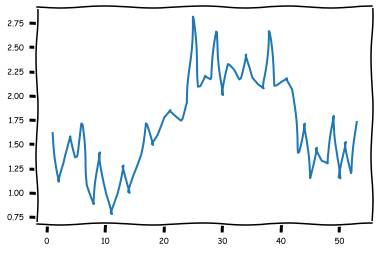

In [43]:
plt.plot(weekly_table['Week'] , weekly_table['Precipitable Water'] )

### Monthly Trend

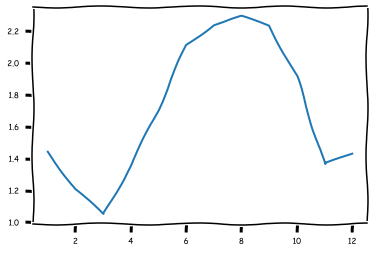

In [44]:
plt.plot(monthly_table['Month'] , monthly_table['Precipitable Water'] )

### Seasonal Trend

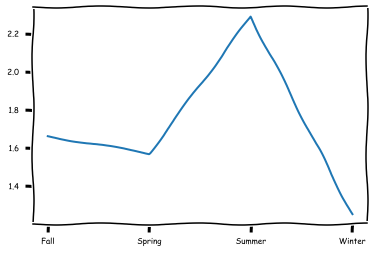

In [45]:
plt.plot(seasonal_table['Season'] , seasonal_table['Precipitable Water'] )

## Trend Within A Month

In [46]:
def generateRandomMonth(n, df):
    random_month = {}
    for i in range(n):
        random_month[i] = np.random.randint(12) + 1
        mask = (df['Month'] == random_month[i])
        df_random_month = df.loc[mask]
        within_month_table = df_random_month.pivot_table(index = ['Day Number']  , aggfunc = { 'Pressure' : np.mean , 'Precipitable Water' : np.mean, 'Relative Humidity':np.mean } )
        within_month_table = within_month_table.reset_index()
        # print(within_month_table.head())
        plt.plot(within_month_table.index , within_month_table['Precipitable Water'] )

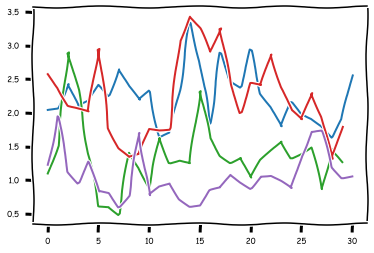

In [47]:
generateRandomMonth(5, df_controlled)

## Trend Within A Season

In [48]:
def generateSeasonsSeperate(df):
    season = ['Spring', 'Summer', 'Fall', 'Winter']
    for i in range(4):
        mask = (df['Season'] == season[i])
        df_season = df.loc[mask]
        within_season_table = df_season.pivot_table(index = ['Day Number']  , aggfunc = { 'Pressure' : np.mean , 'Precipitable Water' : np.mean, 'Relative Humidity':np.mean } )
        within_season_table = within_season_table.reset_index()
        # print(within_month_table.head())
        plt.figure()
        plt.plot(within_season_table.index , within_season_table['Precipitable Water'] )
        plt.title(season[i])
        plt.show()
def generateSeasonsTogether(df):
    season = ['Spring', 'Summer', 'Fall', 'Winter']
    for i in range(4):
        mask = (df['Season'] == season[i])
        df_season = df.loc[mask]
        within_season_table = df_season.pivot_table(index = ['Day Number']  , aggfunc = { 'Pressure' : np.mean , 'Precipitable Water' : np.mean, 'Relative Humidity':np.mean } )
        within_season_table = within_season_table.reset_index()
        plt.plot(within_season_table.index , within_season_table['Precipitable Water'] )
    plt.legend(season)

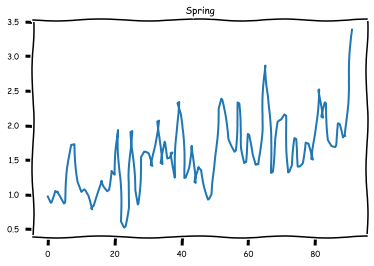

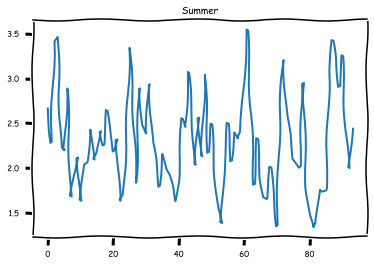

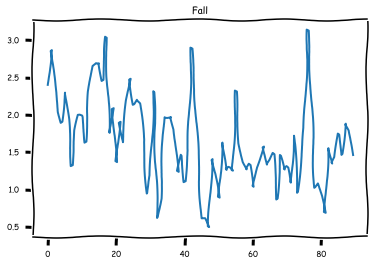

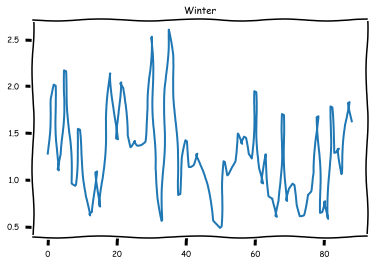

In [49]:
generateSeasonsSeperate(df_controlled_unordered)

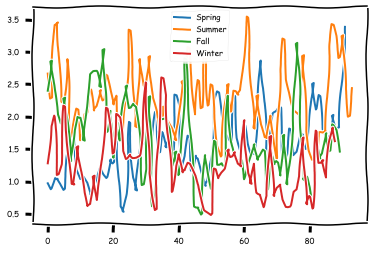

In [50]:
generateSeasonsTogether(df_controlled_unordered)

## Daily Trends

In [51]:
def generateRandomPlots(n, df):
    random_day = {}
    for i in range(n):
        random_day[i] = np.random.randint(365)
        # print(random_day[i])
        mask = (df['Day Number'] == random_day[i])
        df_random_day = df.loc[mask]
        plt.plot(df_random_day['Time'] , df_random_day['Precipitable Water'] )

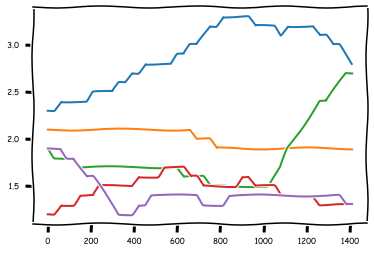

In [52]:
generateRandomPlots(5, df_controlled)

<AxesSubplot:>

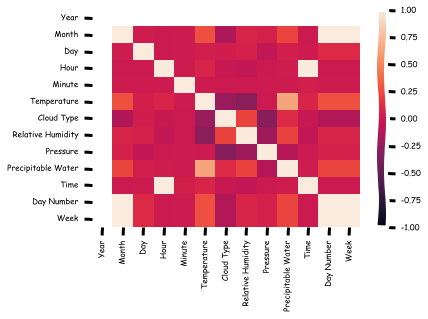

In [53]:
sns.heatmap(df_controlled.corr(), vmin= -1, vmax=1, annot=False)

In [54]:
df_controlled.corr()['Precipitable Water']

Year                       NaN
Month                 0.225125
Day                   0.034762
Hour                  0.011383
Minute                0.000229
Temperature           0.635046
Cloud Type            0.099745
Relative Humidity     0.218254
Pressure             -0.106451
Precipitable Water    1.000000
Time                  0.011384
Day Number            0.226324
Week                  0.225751
Name: Precipitable Water, dtype: float64

# Model Training Ideas
* There seems to be trends within days as well as trends over the year
    * An ideal model will be able to exploit both
    * Hierarchical model with 2 policies—high-level and low-level
1. Year-long model
    * Takes into account variables such as season, week, etc
    1. Average variables over weeks/months/seasons to create a much smaller dataset
    2. Apply our analysis to the entire year's data
2. Seasonal model
    * Takes into account x random days from a particular season
* Build a model for a particular location (x-y pair) first
* Generalise over all locations
    * Requires further data analysis to figure out what area-span to consider

# Model Building

## Converting Categorical Variables

In [55]:
df_controlled_unordered['Day Part'] = df_controlled_unordered['Day Part'].astype('category')
df_controlled_unordered['Day Part'] = df_controlled_unordered['Day Part'].cat.codes

In [56]:
df_controlled_unordered['Season'] = df_controlled_unordered['Season'].astype('category')
df_controlled_unordered['Season'] = df_controlled_unordered['Season'].cat.codes

## Data Scaling

In [144]:
from sklearn.preprocessing import StandardScaler
df_controlled_unordered_normalised = df_controlled_unordered.copy()
df_controlled_unordered_normalised[df_controlled_unordered_normalised.columns] = StandardScaler().fit_transform(df_controlled_unordered_normalised[df_controlled_unordered_normalised.columns])

## Building Short and Long Term Tables

In [145]:
df_controlled_scaled_up.sample(n=15)

,Month,Temperature,Time,Cloud Type,Relative Humidity,Pressure,Precipitable Water,Week,Day Part,Season
2779,2,5.7,1290,4,94.85,1015,1.2,9,Night,Winter
1624,2,2.0,1200,8,60.40,1019,0.8,5,Evening,Winter
15457,11,5.5,30,7,91.96,1002,1.0,47,Night,Fall
14364,10,8.5,360,0,96.61,1017,1.7,43,Morning,Fall
4389,4,6.2,630,4,69.62,1011,0.8,14,Morning,Spring
15732,11,6.6,1080,0,90.12,1001,1.1,47,Evening,Fall
5750,4,8.5,1140,0,92.20,1009,1.2,18,Evening,Spring
4263,3,4.6,1170,2,89.89,1000,1.0,13,Evening,Spring
16989,12,5.6,1350,8,91.36,1005,1.9,51,Night,Fall
70,1,4.7,660,8,94.09,1005,1.8,1,Morning,Winter


In [146]:
df_controlled_scaled_down.sample(n=15)

,Day Number,Hour,Minute,Temperature,Cloud Type,Relative Humidity,Pressure,Precipitable Water,Week,Day Part
2912,61,16,0,7.8,8,96.31,1010,2.4,9,Afternoon
4770,100,9,0,8.9,3,91.36,1009,2.2,15,Morning
14459,302,5,30,10.6,3,96.57,1010,1.7,44,Morning
3363,71,1,30,2.6,0,96.85,1018,0.8,11,Night
1190,25,19,0,7.7,8,94.57,999,1.0,4,Evening
17134,357,23,0,1.2,0,85.04,1012,0.4,52,Night
6344,133,4,0,10.1,4,94.28,997,2.0,20,Night
8378,175,13,0,17.4,3,77.73,1006,1.7,26,Afternoon
8502,178,3,0,11.6,0,93.56,1006,1.6,26,Night
7270,152,11,0,15.1,0,60.85,1012,1.4,22,Morning


In [147]:
df_controlled_unordered.sample(n=15)

,Year,Month,Day,Hour,Minute,Temperature,Cloud Type,Relative Humidity,Pressure,Precipitable Water,Time,Day Number,Week,Day Part,Season
12696,2020,9,22,12,0,16.5,3,77.67,1005,2.5,720,265,38,0,0
5640,2020,4,28,12,0,10.8,8,82.57,1013,2.7,720,118,17,0,1
14721,2020,11,3,16,30,13.9,4,98.23,1000,2.2,990,307,44,0,0
5368,2020,4,22,20,0,10.4,0,92.55,1007,1.9,1200,112,17,1,1
9098,2020,7,9,13,0,16.8,3,72.27,1007,2.1,780,190,28,0,2
1988,2020,2,11,10,0,7.3,4,95.32,1014,1.2,600,42,7,2,3
16191,2020,12,4,7,30,6.6,0,96.26,1019,1.0,450,338,49,2,0
8422,2020,6,25,11,0,21.3,0,63.52,1009,2.1,660,176,26,2,2
4070,2020,3,26,19,0,5.2,8,93.07,1005,1.6,1140,85,13,1,1
8886,2020,7,5,3,0,9.9,0,93.80,1012,2.0,180,186,27,3,2


#### Long Term

In [148]:
# train, test = sklearn.model_selection.train_test_split(df_controlled_scaled_up, test_size=0.2, random_state = 4)
# x_train = train[['Month', 'Temperature', 'Cloud Type', 'Relative Humidity', 'Pressure', 'Time', Week', 'Day Part', 'Season']]
# y_train = train[['Precipitable Water']]
# x_test = test[['Month', 'Temperature', 'Cloud Type', 'Relative Humidity', 'Pressure', 'Time', Week', 'Day Part', 'Season']]
# y_test = test[['Precipitable Water']]

#### Short Term

In [149]:
# train, test = sklearn.model_selection.train_test_split(df_controlled_scaled_down, test_size=0.2, random_state = 4)
# x_train = train[['Day Number', 'Time', 'Temperature', 'Cloud Type', 'Relative Humidity', 'Pressure', 'Week']]
# y_train = train[['Precipitable Water']]
# x_test = test[['Month','Day Number', 'Hour', 'Minute', 'Temperature', 'Cloud Type', 'Relative Humidity', 'Pressure', 'Week']]
# y_test = test[['Precipitable Water']]

#### Overall

In [58]:
train, test = sklearn.model_selection.train_test_split(df_controlled_unordered, test_size=0.2, random_state = 4)
x_train = train[['Season', 'Temperature', 'Cloud Type', 'Relative Humidity', 'Pressure']]
y_train = train[['Precipitable Water']]
x_test = test[['Season', 'Temperature', 'Cloud Type', 'Relative Humidity', 'Pressure']]
y_test = test[['Precipitable Water']]

1. Fix categorical variables
2. Think if any other variables impact precipitable water

### Baseline (Polynomial Regression)

In [41]:
import math

In [42]:
def sh(rh, temp, p):
    sh_val = rh*(3800)*math.exp(17.625/(temp+243.04))/p
    return sh_val

In [43]:
df_controlled_unordered['Specific Humidity'] = df_controlled_unordered.apply(lambda df : sh(float(df['Relative Humidity']), float(df['Temperature']), float(df['Pressure'])), axis = 1)


In [44]:
train, test = sklearn.model_selection.train_test_split(df_controlled_unordered, test_size=0.2, random_state = 4)
x_train = train[['Specific Humidity']]
y_train = train[['Precipitable Water']]
x_test = test[['Specific Humidity']]
y_test = test[['Precipitable Water']]

In [45]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

In [46]:
y_predicted = linear_regression.predict(x_test)

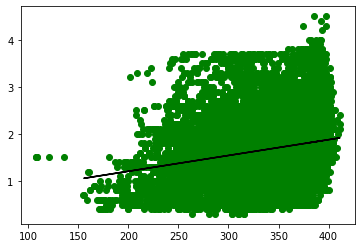

In [47]:
plt.scatter(x_train, y_train,color='g') 
plt.plot(x_test, y_predicted,color='k') 

In [48]:
df_controlled_unordered['Specific Humidity']

3744     373.332125
3745     373.332125
3746     372.570792
3747     372.570792
3748     371.845398
            ...    
17509    394.742422
17510    389.327124
17511    391.922465
17512    389.625002
17513    389.625002
Name: Specific Humidity, Length: 17520, dtype: float64

### Random Forest

In [151]:
from sklearn.ensemble import RandomForestRegressor
forest_regression = RandomForestRegressor()
forest_regression.fit(x_train, y_train)

/var/folders/s4/kwh94x893cx7r1phpl_k4fk80000gn/T/ipykernel_12669/2747051691.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_regression.fit(x_train, y_train)


RandomForestRegressor()

In [152]:
y_predicted = forest_regression.predict(x_test)

In [153]:
from sklearn import metrics

print('R-squared:', metrics.r2_score(y_test, y_predicted))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('RMSE represents the square root of the variance of the residuals')

R-squared: 0.835233153801852
Mean Absolute Error: 0.19367311779734725
Mean Squared Error: 0.08603896835598644
Root Mean Squared Error: 0.29332399894312505
RMSE represents the square root of the variance of the residuals


### Linear Regression

In [154]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

In [155]:
y_predicted = linear_regression.predict(x_test)

In [156]:
from sklearn import metrics

print('R-squared:', metrics.r2_score(y_test, y_predicted))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('RMSE represents the square root of the variance of the residuals')

R-squared: 0.6329234425816104
Mean Absolute Error: 0.3360638447961988
Mean Squared Error: 0.19168230160795693
Root Mean Squared Error: 0.43781537388259556
RMSE represents the square root of the variance of the residuals
